In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [3]:
plt.style.use('ggplot')

In [4]:
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

#flight_list = [outbound_file, inbound_file]
#all_flights = pd.concat(flight_list)

In [5]:
# Calculate total flights per month
total_outbound_flights = outbound.groupby(['Month']).count()
total_outbound_flights = pd.DataFrame(total_outbound_flights['TailNum'])
total_outbound_flights = total_outbound_flights.rename(columns={'TailNum':'Outbound Flights'})

total_inbound_flights = inbound.groupby(['Month']).count()
total_inbound_flights = pd.DataFrame(total_inbound_flights['TailNum'])
total_inbound_flights = total_inbound_flights.rename(columns={'TailNum':'Inbound Flights'})

total_flights = pd.concat([total_outbound_flights, total_inbound_flights], axis=1, join_axes=[total_outbound_flights.index])
total_flights['Total Flights'] = total_flights.sum(axis=1)
total_flights = total_flights[['Total Flights']]

In [6]:
#Outbound Flight Delays
outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
total_outbound_delays = len(outbound_delays['FlightNum'])
print(f"Total outbound delays: {total_outbound_delays}")

monthly_outbound = outbound_delays.groupby(['Month']).sum()
m_outbound_sum = pd.DataFrame(monthly_outbound['DepDel15'])

#Inbound Flight Delays
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]
total_inbound_delays = len(inbound_delays['FlightNum'])
print(f"Total inbound delays: {total_inbound_delays}")

monthly_inbound = inbound_delays.groupby(['Month']).sum()
m_inbound_sum = pd.DataFrame(monthly_inbound['ArrDel15'])


Total outbound delays: 48494
Total inbound delays: 49065


In [9]:
merged = m_outbound_sum.join(m_inbound_sum)
merged['AllDelays'] = merged.sum(axis=1)
total_delays = pd.DataFrame(merged['AllDelays']).astype(int)
total_delays

,AllDelays
Month,
1,6390
2,4595
3,7353
4,6030
5,6987
6,11143
7,10654
8,10355
9,6592


In [14]:
# Calculate percentage delayed flights per month

perc_delays = pd.concat([total_delays, total_flights], axis=1, join_axes=[total_delays.index])
perc_delays['Delay Percentage'] = round((perc_delays['AllDelays']/perc_delays['Total Flights'])*100, 2)
perc_delays = perc_delays[['Delay Percentage']]
perc_delays


,Delay Percentage
Month,
1,19.83
2,15.06
3,21.44
4,17.89
5,19.90
6,29.48
7,27.07
8,26.56
9,18.89


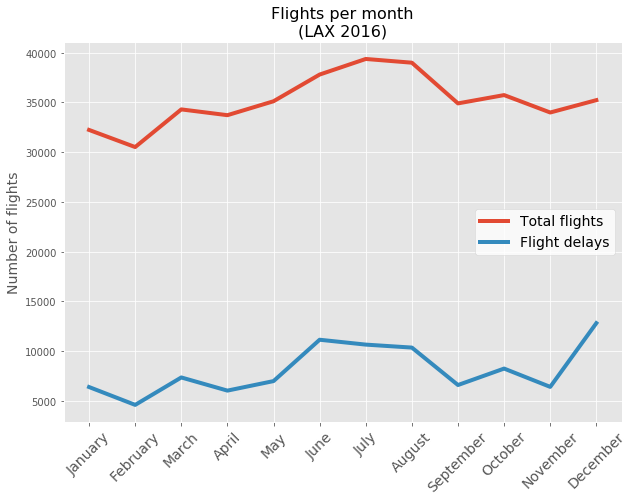

In [44]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]

plt.figure(figsize=(10,7))
plt.plot(x_axis, total_flights['Total Flights'], label='Total flights', linewidth=4)
plt.plot(x_axis, total_delays['AllDelays'], label='Flight delays', linewidth=4)

plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Number of flights', size=14)
plt.title('Flights per month\n(LAX 2016)', size=16)
legend = plt.legend(loc=5, fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.savefig('images/flights_per_month.png', bbox_inches='tight')
plt.show()

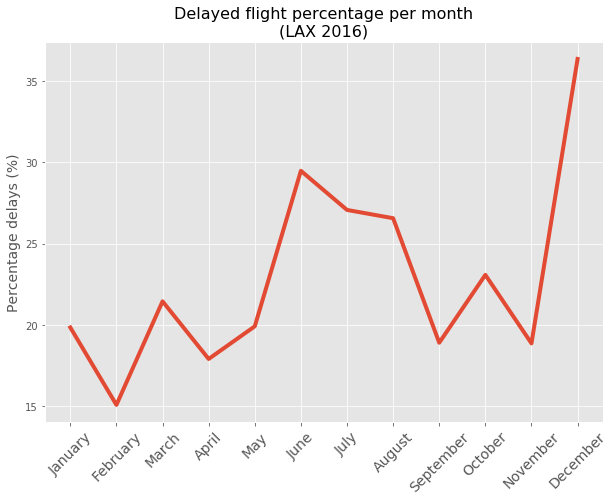

In [41]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]

plt.figure(figsize=(10,7))
plt.plot(x_axis, perc_delays['Delay Percentage'], linewidth=4)
plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Percentage delays (%)', size=14)
plt.title('Delayed flight percentage per month\n(LAX 2016)', size=16)
plt.savefig('images/flight_delay_percent.png', bbox_inches='tight')
plt.show()